In [2]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
import os

In [52]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128

train_generator = train_datagen.flow_from_directory(
    'input/Train_Nums',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)
validation_generator = val_datagen.flow_from_directory(
    'input/Test_Nums',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 9900 images belonging to 11 classes.
Found 1100 images belonging to 11 classes.


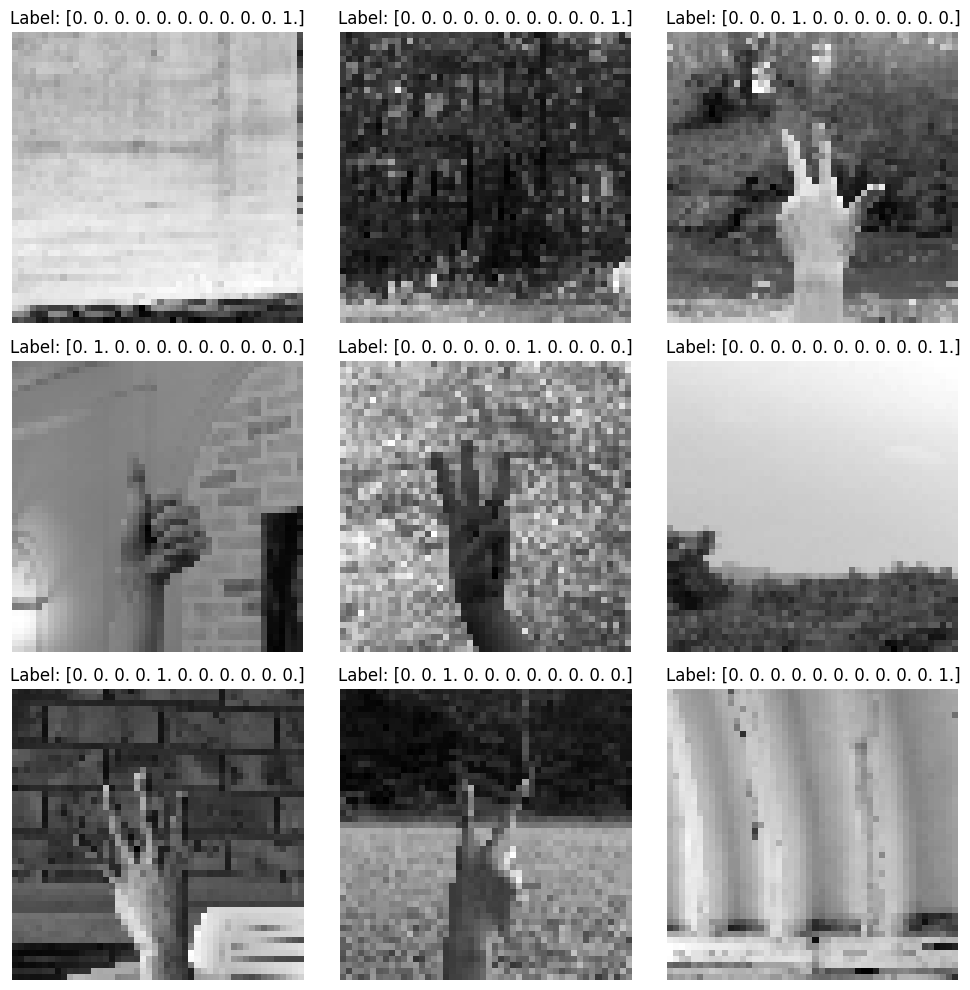

In [53]:
import matplotlib.pyplot as plt

# Get a batch of data from the generator
batch = next(train_generator)

# Extract images and labels from the batch
images, labels = batch

# Display the first image and its label
plt.figure(figsize=(10, 10))
for i in range(9):  # Displaying first 9 images from the batch
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].reshape(48, 48), cmap='gray')  # Assuming images are grayscale
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [15]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'Blank']


In [40]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(11, activation='softmax'))

c:\Users\Verma's\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 46, 46, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │    13,107,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,489,547 (51.46 MB)

 Trainable params: 13,489,547 (51.46 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [43]:
!rm -rf Logs
logdir = os.path.join("Logs")
tensorboard_callback = TensorBoard(log_dir=logdir)

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [45]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.6428 - loss: 0.9795 - val_accuracy: 0.8154 - val_loss: 0.5909
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7891 - loss: 0.6028 - val_accuracy: 0.7500 - val_loss: 0.6760
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.7818 - loss: 0.6050 - val_accuracy: 0.8750 - val_loss: 0.4273
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7734 - loss: 0.5364 - val_accuracy: 0.8289 - val_loss: 0.4830
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.8656 - loss: 0.4113 - val_accuracy: 0.9072 - val_loss: 0.3041
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9141 - loss: 0.2918 - val_accuracy: 0.8684 - val_loss: 0.4764
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.9110 - loss: 0.2790 - val_accuracy: 0.9131 - val_loss: 0.3007
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8672 - loss: 0.4568 - val_accuracy: 0.9079 - val_loss:

In [60]:
%load_ext tensorboard
%tensorboard --logdir Logs

In [61]:
model_json = model.to_json()
with open("model/mainModel.json",'w') as json_file:
    json_file.write(model_json)
model.save("model/mainModel.h5")